## Outlier handling using Z-SCORE

In [3]:
# Step 1: import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings as wr
wr.filterwarnings('ignore')

In [4]:
# Step 2:read the dataset and creat dataframe

data=pd.read_csv(r"D:\New\weight_hight\weight-height.csv")
df=pd.DataFrame(data)
df.sample(5)

,Gender,Height,Weight
7915,Female,59.939405,110.614615
6208,Female,61.983445,110.514437
4113,Male,68.171399,190.235688
1515,Male,62.168969,147.859653
9830,Female,61.803864,125.228439


<Axes: ylabel='Height'>

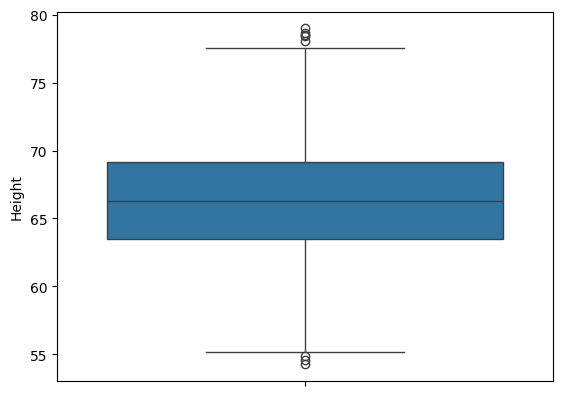

In [14]:
sns.boxplot(df['Height'])

In [6]:
# check info of dataframe

df.info()# check info of dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [15]:
df.describe()

,Height,Weight,zscore_h
count,10000.000000,10000.000000,1.000000e+04
mean,66.367560,161.440357,2.273737e-16
std,3.847528,32.108439,1.000000e+00
min,54.263133,64.700127,-3.146027e+00
25%,63.505620,135.818051,-7.438384e-01
50%,66.318070,161.212928,-1.286272e-02
75%,69.174262,187.169525,7.294819e-01
max,78.998742,269.989699,3.282934e+00


z-score = z score indicates how many standard deviation away a data point from mean

z score formula ==> z = x - mean / std.dev

In [ ]:
# Step 3: calculate z score of height and weight column

df['zscore_h']= (df['Height'] - df['Height'].mean())/df['Height'].std()
df['zscore_h']

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: zscore_h, Length: 10000, dtype: float64

In [8]:
df.head()

,Gender,Height,Weight,zscore_h
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [ ]:
#Step 4: see outlier in height column

df[(df['zscore_h'] > 3) | (df['zscore_h'] < -3)]

,Gender,Height,Weight,zscore_h
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [11]:
# Step 5: remove outlier in orijnal dataframe and create new df
df_no_outlier=df[(df['zscore_h'] < 3) & (df['zscore_h'] > -3)]
df_no_outlier

,Gender,Height,Weight,zscore_h
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


<Axes: ylabel='Height'>

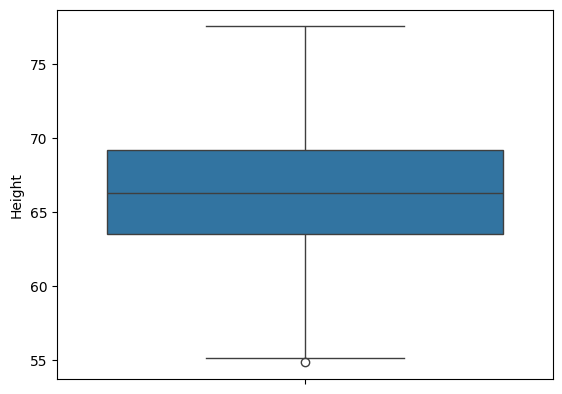

In [13]:
sns.boxplot(df_no_outlier['Height'])